In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from transformers import AutoTokenizer, AutoModelForCausalLM

In [2]:
df_160m = pd.read_csv('/outputs/famous_quotes/output_famous_quotes_160m_token.csv')
df_410m = pd.read_csv('/outputs/famous_quotes/output_famous_quotes_410m_ps.csv')
df_14b = pd.read_csv('/outputs/famous_quotes/output_famous_quotes_1.4b_token.csv')
df_69b = pd.read_csv('/outputs/famous_quotes/output_famous_quotes_6.9b_token.csv')
df_12b = pd.read_csv('/outputs/famous_quotes/output_famous_quotes_12b_token.csv')

In [3]:
df_160m_f = df_160m[df_160m['result'] == False]
df_160m_t = df_160m[df_160m['result'] == True]

df_410m_f = df_410m[df_410m['result'] == False]
df_410m_t = df_410m[df_410m['result'] == True]

df_14b_f = df_14b[df_14b['result'] == False]
df_14b_t = df_14b[df_14b['result'] == True]

df_69b_f = df_69b[df_69b['result'] == False]
df_69b_t = df_69b[df_69b['result'] == True]

df_12b_f = df_12b[df_12b['result'] == False]
df_12b_t = df_12b[df_12b['result'] == True]

In [4]:
# Memorized portion
mem_rate_160m = df_160m_t.shape[0] / df_160m.shape[0]
mem_rate_410m = df_410m_t.shape[0] / df_410m.shape[0]
mem_rate_14b = df_14b_t.shape[0] / df_14b.shape[0]
mem_rate_69b = df_69b_t.shape[0] / df_69b.shape[0]
mem_rate_12b = df_12b_t.shape[0] / df_12b.shape[0]

print(f'Memorized portion of 160m model: {mem_rate_160m}')
print(f'Memorized portion of 410m model: {mem_rate_410m}')
print(f'Memorized portion of 1.4b model: {mem_rate_14b}')
print(f'Memorized portion of 6.9b model: {mem_rate_69b}')
print(f'Memorized portion of 12b model: {mem_rate_12b}')

Memorized portion of 160m model: 0.19791666666666666
Memorized portion of 410m model: 0.3958333333333333
Memorized portion of 1.4b model: 0.7083333333333334
Memorized portion of 6.9b model: 0.8421052631578947
Memorized portion of 12b model: 0.8315789473684211


### Takeaway: Bigger model memorize more.

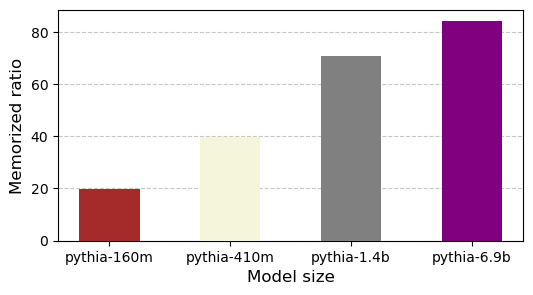

In [5]:
import matplotlib.pyplot as plt

# Example data (replace with your values)
labels = ['pythia-160m', 'pythia-410m', 'pythia-1.4b', 'pythia-6.9b']
values = [mem_rate_160m * 100.0, mem_rate_410m * 100.0, mem_rate_14b * 100.0, mem_rate_69b * 100.0]

plt.figure(figsize=(6, 3))
plt.bar(labels, values, color=['brown', 'beige', 'gray', 'purple'], width=0.5, zorder=3)
plt.xlabel('Model size', fontsize=12)
plt.ylabel('Memorized ratio', fontsize=12)
# plt.title('Bar Plot of Four Values', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [6]:
# if true, n_match / n_runs?

# 160m model.
df_160m_t['ratio_match_runs'] = df_160m_t['n_match'] / df_160m_t['n_runs'].replace(0, pd.NA)  # Avoid division by zero
df_410m_t['ratio_match_runs'] = df_410m_t['n_match'] / df_410m_t['n_runs'].replace(0, pd.NA)
df_14b_t['ratio_match_runs'] = df_14b_t['n_match'] / df_14b_t['n_runs'].replace(0, pd.NA)
df_69b_t['ratio_match_runs'] = df_69b_t['n_match'] / df_69b_t['n_runs'].replace(0, pd.NA)
df_12b_t['ratio_match_runs'] = df_12b_t['n_match'] / df_12b_t['n_runs'].replace(0, pd.NA)

# # Plot the ratio_match_runs
# plt.figure(figsize=(10, 6))
# plt.plot(df_160m_t.index, df_160m_t['ratio_match_runs'], marker='o', linestyle='-', color='b')
# plt.xlabel('Data Point Index')
# plt.ylabel(f'Ratio of n_match/n_runs')
# plt.title(f'Ratio of n_match to n_runs Across All Data Points')
# plt.grid(True)
# plt.show()
print(f'avg ratio_match_runs between n_match/n_runs of 160m: {df_160m_t.ratio_match_runs.mean()}')
print(f'avg ratio_match_runs between n_match/n_runs of 410m: {df_410m_t.ratio_match_runs.mean()}')
print(f'avg ratio_match_runs between n_match/n_runs of 14b: {df_14b_t.ratio_match_runs.mean()}')
print(f'avg ratio_match_runs between n_match/n_runs of 69b: {df_69b_t.ratio_match_runs.mean()}')
print(f'avg ratio_match_runs between n_match/n_runs of 12b: {df_12b_t.ratio_match_runs.mean()}')

avg ratio_match_runs between n_match/n_runs of 160m: 0.5982456140350877
avg ratio_match_runs between n_match/n_runs of 410m: 0.7517439431913117
avg ratio_match_runs between n_match/n_runs of 14b: 0.8675945378151261
avg ratio_match_runs between n_match/n_runs of 69b: 0.9022321428571429
avg ratio_match_runs between n_match/n_runs of 12b: 0.7539330922242314


/tmp/ipykernel_32371/3207210740.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_160m_t['ratio_match_runs'] = df_160m_t['n_match'] / df_160m_t['n_runs'].replace(0, pd.NA)  # Avoid division by zero
/tmp/ipykernel_32371/3207210740.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_410m_t['ratio_match_runs'] = df_410m_t['n_match'] / df_410m_t['n_runs'].replace(0, pd.NA)
/tmp/ipykernel_32371/3207210740.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

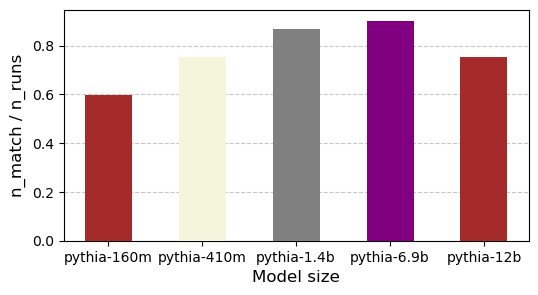

In [7]:
labels = ['pythia-160m', 'pythia-410m', 'pythia-1.4b', 'pythia-6.9b', 'pythia-12b']
values = [df_160m_t.ratio_match_runs.mean(), df_410m_t.ratio_match_runs.mean(), df_14b_t.ratio_match_runs.mean(), df_69b_t.ratio_match_runs.mean(), df_12b_t.ratio_match_runs.mean()]

plt.figure(figsize=(6, 3))
plt.bar(labels, values, color=['brown', 'beige', 'gray', 'purple'], width=0.5, zorder=3)
plt.xlabel('Model size', fontsize=12)
plt.ylabel('n_match / n_runs', fontsize=12)
# plt.title('Bar Plot of Four Values', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [8]:
# if false, n_match / n_runs?
df_160m_f['ratio_match_run'] = df_160m_f['n_match'] / df_160m_f['n_runs'].replace(0, pd.NA)  # Avoid division by zero
df_410m_f['ratio_match_run'] = df_410m_f['n_match'] / df_410m_f['n_runs'].replace(0, pd.NA)
df_14b_f['ratio_match_run'] = df_14b_f['n_match'] / df_14b_f['n_runs'].replace(0, pd.NA)
df_69b_f['ratio_match_run'] = df_69b_f['n_match'] / df_69b_f['n_runs'].replace(0, pd.NA)
df_12b_f['ratio_match_run'] = df_12b_f['n_match'] / df_12b_f['n_runs'].replace(0, pd.NA)

# # Plot the ratio_match_run
# plt.figure(figsize=(10, 6))
# plt.plot(df_160m_f.index, df_160m_f['ratio_match_run'], marker='o', linestyle='-', color='b')
# plt.xlabel('Data Point Index')
# plt.ylabel(f'Ratio of n_match/n_runs')
# plt.title(f'Ratio of n_match to n_runs Across All Data Points')
# plt.grid(True)
# plt.show()
print(f'avg ratio_match_run between n_match/n_runs of 160m: {df_160m_f.ratio_match_run.mean()}')
print(f'avg ratio_match_run between n_match/n_runs of 410m: {df_410m_f.ratio_match_run.mean()}')
print(f'avg ratio_match_run between n_match/n_runs of 14b: {df_14b_f.ratio_match_run.mean()}')
print(f'avg ratio_match_run between n_match/n_runs of 69b: {df_69b_f.ratio_match_run.mean()}')
print(f'avg ratio_match_run between n_match/n_runs of 12b: {df_12b_f.ratio_match_run.mean()}')

avg ratio_match_run between n_match/n_runs of 160m: 0.018181818181818184
avg ratio_match_run between n_match/n_runs of 410m: 0.03620689655172414
avg ratio_match_run between n_match/n_runs of 14b: 0.06428571428571428
avg ratio_match_run between n_match/n_runs of 69b: 0.10000000000000002
avg ratio_match_run between n_match/n_runs of 12b: 0.037500000000000006


/tmp/ipykernel_32371/1137002501.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_160m_f['ratio_match_run'] = df_160m_f['n_match'] / df_160m_f['n_runs'].replace(0, pd.NA)  # Avoid division by zero
/tmp/ipykernel_32371/1137002501.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_410m_f['ratio_match_run'] = df_410m_f['n_match'] / df_410m_f['n_runs'].replace(0, pd.NA)
/tmp/ipykernel_32371/1137002501.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

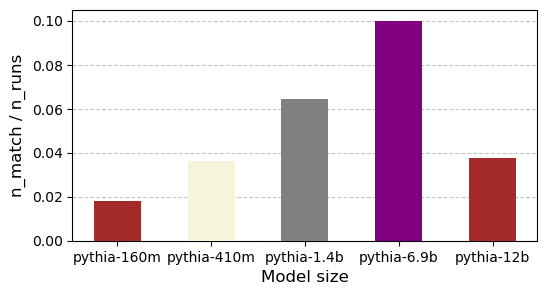

In [9]:
labels = ['pythia-160m', 'pythia-410m', 'pythia-1.4b', 'pythia-6.9b', 'pythia-12b']
values = [df_160m_f.ratio_match_run.mean(), df_410m_f.ratio_match_run.mean(), df_14b_f.ratio_match_run.mean(), df_69b_f.ratio_match_run.mean(), df_12b_f.ratio_match_run.mean()]

plt.figure(figsize=(6, 3))
plt.bar(labels, values, color=['brown', 'beige', 'gray', 'purple'], width=0.5, zorder=3)
plt.xlabel('Model size', fontsize=12)
plt.ylabel('n_match / n_runs', fontsize=12)
# plt.title('Bar Plot of Four Values', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [10]:
# if false, n_match/n_prefix
# if false, n_match / n_runs?
df_160m_f['ratio_match_prefix'] = df_160m_f['n_match'] / df_160m_f['n_prefix'].replace(0, pd.NA)  # Avoid division by zero
df_410m_f['ratio_match_prefix'] = df_410m_f['n_match'] / df_410m_f['n_prefix'].replace(0, pd.NA)
df_14b_f['ratio_match_prefix'] = df_14b_f['n_match'] / df_14b_f['n_prefix'].replace(0, pd.NA)
df_69b_f['ratio_match_prefix'] = df_69b_f['n_match'] / df_69b_f['n_prefix'].replace(0, pd.NA)
df_12b_f['ratio_match_prefix'] = df_12b_f['n_match'] / df_12b_f['n_prefix'].replace(0, pd.NA)
# # Plot the ratio_match_prefix
# plt.figure(figsize=(10, 6))
# plt.plot(df_160m_f.index, df_160m_f['ratio_match_prefix'], marker='o', linestyle='-', color='b')
# plt.xlabel('Data Point Index')
# plt.ylabel(f'Ratio of n_match/n_prefix')
# plt.title(f'Ratio of n_match to n_prefix Across All Data Points')
# plt.grid(True)
# plt.show()
print(f'avg ratio_match_prefix between n_match/n_prefix of 160m: {df_160m_f.ratio_match_prefix.mean()}')
print(f'avg ratio_match_prefix between n_match/n_prefix of 410m: {df_410m_f.ratio_match_prefix.mean()}')
print(f'avg ratio_match_prefix between n_match/n_prefix of 14b: {df_14b_f.ratio_match_prefix.mean()}')
print(f'avg ratio_match_prefix between n_match/n_prefix of 69b: {df_69b_f.ratio_match_prefix.mean()}')
print(f'avg ratio_match_prefix between n_match/n_prefix of 12b: {df_12b_f.ratio_match_prefix.mean()}')

avg ratio_match_prefix between n_match/n_prefix of 160m: 0.07761194029850746
avg ratio_match_prefix between n_match/n_prefix of 410m: 0.11969696969696969
avg ratio_match_prefix between n_match/n_prefix of 14b: 0.14906462585034014
avg ratio_match_prefix between n_match/n_prefix of 69b: 0.24444444444444446
avg ratio_match_prefix between n_match/n_prefix of 12b: 0.08333333333333333


/tmp/ipykernel_32371/3584024617.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_160m_f['ratio_match_prefix'] = df_160m_f['n_match'] / df_160m_f['n_prefix'].replace(0, pd.NA)  # Avoid division by zero
/tmp/ipykernel_32371/3584024617.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_410m_f['ratio_match_prefix'] = df_410m_f['n_match'] / df_410m_f['n_prefix'].replace(0, pd.NA)
/tmp/ipykernel_32371/3584024617.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [11]:
# if false, how many are zero match?
n_zero_160m_f = len(df_160m_f[df_160m_f['n_match'] == 0])
n_zero_410m_f = len(df_410m_f[df_410m_f['n_match'] == 0])
n_zero_14b_f = len(df_14b_f[df_14b_f['n_match'] == 0])
n_zero_69b_f = len(df_69b_f[df_69b_f['n_match'] == 0])
n_zero_12b_f = len(df_12b_f[df_12b_f['n_match'] == 0])

print(f'160m n_zero/n_false: {n_zero_160m_f}/{len(df_160m_f)}, {n_zero_160m_f/len(df_160m_f) * 100:.2f}%')
print(f'410m n_zero/n_false: {n_zero_410m_f}/{len(df_410m_f)}, {n_zero_410m_f/len(df_410m_f) * 100:.2f}%')
print(f'1.4b n_zero/n_false: {n_zero_14b_f}/{len(df_14b_f)}, {n_zero_14b_f/len(df_14b_f) * 100:.2f}%')
print(f'6.9b n_zero/n_false: {n_zero_69b_f}/{len(df_69b_f)},{n_zero_69b_f/len(df_69b_f) * 100:.2f}%')
print(f'12b n_zero/n_false: {n_zero_12b_f}/{len(df_12b_f)},{n_zero_12b_f/len(df_12b_f) * 100:.2f}%')


160m n_zero/n_false: 66/77, 85.71%
410m n_zero/n_false: 44/58, 75.86%
1.4b n_zero/n_false: 21/28, 75.00%
6.9b n_zero/n_false: 8/15,53.33%
12b n_zero/n_false: 13/16,81.25%


### Takeaway: hard to find even a single sequence to generate a non-memorized samples, while for a memorized sample it's much more easier. in fact, gcg can generate the memorized sample with most of the seed.

In [12]:
# if false, how many are 1-match?
n_1_160m_f = len(df_160m_f[df_160m_f['n_match'] == 1])
n_1_410m_f = len(df_410m_f[df_410m_f['n_match'] == 1])
n_1_14b_f = len(df_14b_f[df_14b_f['n_match'] == 1])
n_1_69b_f = len(df_69b_f[df_69b_f['n_match'] == 1])
n_1_12b_f = len(df_12b_f[df_12b_f['n_match'] == 1])


print(f'160m n_1/n_false: {n_1_160m_f}/{len(df_160m_f)}, {n_1_160m_f/len(df_160m_f) * 100:.2f}%')
print(f'410m n_1/n_false: {n_1_410m_f}/{len(df_410m_f)}, {n_1_410m_f/len(df_410m_f) * 100:.2f}%')
print(f'1.4b n_1/n_false: {n_1_14b_f}/{len(df_14b_f)}, {n_1_14b_f/len(df_14b_f) * 100:.2f}%')
print(f'6.9b n_1/n_false: {n_1_69b_f}/{len(df_69b_f)}, {n_1_69b_f/len(df_69b_f) * 100:.2f}%')
print(f'12b n_1/n_false: {n_1_12b_f}/{len(df_12b_f)}, {n_1_12b_f/len(df_12b_f) * 100:.2f}%')

160m n_1/n_false: 9/77, 11.69%
410m n_1/n_false: 10/58, 17.24%
1.4b n_1/n_false: 2/28, 7.14%
6.9b n_1/n_false: 4/15, 26.67%
12b n_1/n_false: 1/16, 6.25%


In [20]:
# Compute counts
counts = (
    df_12b.groupby('n_token')['result']
    .agg([('count_true', 'sum'), ('total_count', 'count')])
    .reset_index()
)

(counts)


,n_token,count_true,total_count
0,5,1,1
1,6,1,1
2,7,2,2
3,8,3,3
4,9,6,6
5,10,2,3
6,11,6,6
7,12,9,12
8,13,10,12
9,14,5,6


In [18]:
df_160m

,text,dummy,result,eta,n_prefix,n_match,n_runs,seed_prefix,n_token
0,The road to success and the road to failure ar...,True,False,tensor(0.2591),3,0,10,[],15
1,The two most important days in your life are t...,True,False,tensor(0.1476),3,0,10,[],22
2,"Your time is limited, don't waste it living so...",True,True,tensor(0.1668),2,2,3,"[[187748837, ' over CongressPeterSUPPORT x cou...",15
3,In order to be irreplaceable one must always b...,True,True,tensor(0.0822),1,1,5,"[[141892047, ' Require Missingity in Order ln ...",13
4,"If you look at what you have in life, you'll a...",True,False,tensor(0.0475),0,0,10,[],16
...,...,...,...,...,...,...,...,...,...
91,The best dreams happen when you're awake.,True,True,tensor(0.2049),1,1,3,"[[44508455, 'edinones------gl.""). /*Best_."" aw...",9
92,"Life is really simple, but we insist on making...",True,False,tensor(0.1493),1,0,10,[],13
93,Change your thoughts and you change your world.,True,False,tensor(0.2691),2,0,10,[],9
94,Happiness is not something you postpone for th...,True,False,tensor(0.1108),2,0,10,[],22


In [26]:
# numerical values
df_160m['eta_value'] = (
    df_160m['eta'].str.split('(', n=1, expand=True)[1]
    .str.rstrip(')').astype(float)
)

# Compute average eta per n_token
avgeta = df_160m.groupby('n_token')['eta_value'].mean().reset_index()

avgeta

,n_token,eta_value
0,5,0.000000
1,6,0.051700
2,7,0.107600
3,8,0.098367
4,9,0.169433
5,10,0.119867
6,11,0.130250
7,12,0.225117
8,13,0.174042
9,14,0.197767


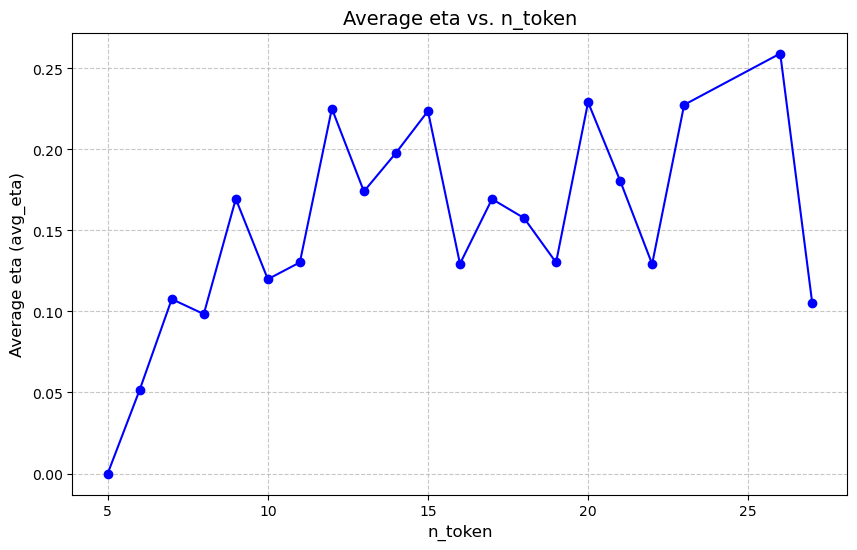

In [27]:
# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(avgeta['n_token'], avgeta['eta_value'], marker='o', linestyle='-', color='blue')

# Customize the plot
plt.xlabel('n_token', fontsize=12)
plt.ylabel('Average eta (avg_eta)', fontsize=12)
plt.title('Average eta vs. n_token', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()

In [28]:
avg_prefix = df_160m.groupby('n_token')['n_prefix'].mean().reset_index()

avg_prefix

,n_token,n_prefix
0,5,0.000000
1,6,0.000000
2,7,0.500000
3,8,0.333333
4,9,1.000000
5,10,0.666667
6,11,1.166667
7,12,2.250000
8,13,1.833333
9,14,2.166667


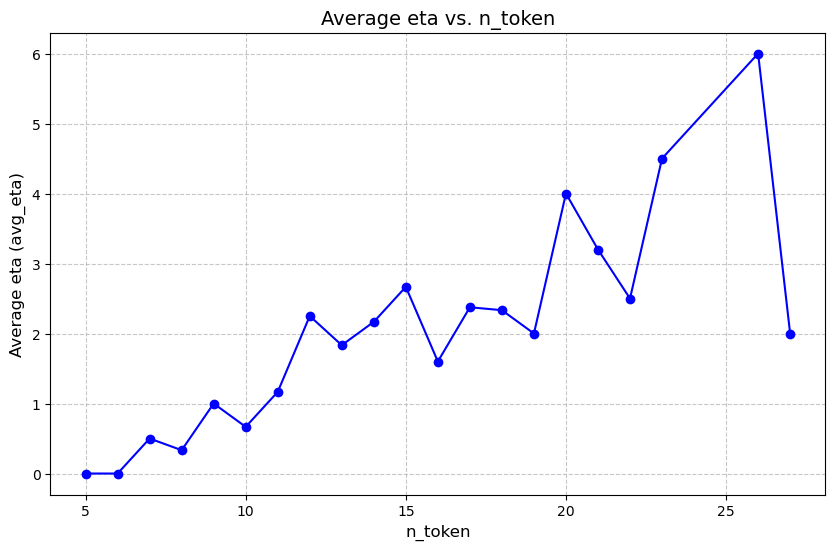

In [29]:
plt.figure(figsize=(10, 6))
plt.plot(avg_prefix['n_token'], avg_prefix['n_prefix'], marker='o', linestyle='-', color='blue')

# Customize the plot
plt.xlabel('n_token', fontsize=12)
plt.ylabel('Average eta (avg_eta)', fontsize=12)
plt.title('Average eta vs. n_token', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()